# Integrals - Homework

__Métodos Intensivos de Computación Estadística__

Juan Sebastián Corredor Rodriguez - jucorredorr@unal.edu.co

See my [Github Account](https://github.com/juanse1608) to know more about me and my projects.

In each case solve the integral analytically and compare it with the results obtained from doing Monte Carlo and Quasi - Monte Carlo methods.

In [67]:
#Loading the required libraries
import numpy as np
import scipy as sc
import simpy as sp
import pandas as pd
import math
import ghalton
import time
import random
import matplotlib.pylab as plt
from matplotlib.ticker import StrMethodFormatter

## First Integral.

Solve the following integral for $s=10,15,20,30$:
$$ \int_{[0,1]^{s}} \text{exp} \left[ \prod_{i=1}^{s} x_i \right] dx_1\ldots dx_s $$

### Monte Carlo Integration

Let's implement the Monte Carlo Method and see its results.

__Monte Carlo Method Implementation__

In [2]:
#Computation of Monte Carlo

#Overview of the problem with an example in dimension 10

#The parameter s determines the dimension of the data
s = 10
sample_size = 10000

#Generate the samples in [0,1]^s, it is important to mention that theese samples are easy to generate since
#the domain is the cube, so we require a sample in [0,1] for each dimension.
samples = np.random.uniform(0, 1, (sample_size, s))

#Let's corroborate the shape of the sample matrix
samples.shape

(10000, 10)

In [3]:
#Let's convert it to a Dataframe Object
samples = pd.DataFrame(samples)
samples.shape

(10000, 10)

In [4]:
#Let's compute the function in the samples
multiplication = samples.apply(np.prod, axis = 1)
exponential = np.array(np.exp(multiplication))

#Let's compute the mean and so, the Monte Carlo Integration
value_mc = np.mean(exponential)
value_mc

1.0009185830551914

Let's start with the timing for dimension 10.

In [53]:
#Let's do it changing the sample size and evaluating its convergence
dimensions = [10,15,20,30]
value_mc_for_dimension = []
times_for_dimension = []
for dimension in dimensions:
    time_inicial = time.time()
    indice = 1
    value_mc = []
    while indice <= 1000:
        sample_size = indice

        #Generate the samples in [0,1]^s, it is important to mention that theese samples are easy to generate since
        #the domain is the cube, so we require a sample in [0,1] for each dimension.
        samples = np.random.uniform(0, 1, (sample_size, dimension))
        samples = pd.DataFrame(samples)
        #Let's compute the function in the samples
        multiplication = samples.apply(np.prod, axis = 1)
        exponential = np.array(np.exp(multiplication))

        #Let's compute the mean and so, the Monte Carlo Integration
        value_mc.append(np.mean(exponential))
        indice += 1
        if indice%200 == 0:
            print("Dimension: " + np.str(dimension) + " and Sample Size: " + np.str(indice))
    time_final = time.time() - time_inicial
    times_for_dimension.append(time_final)
    value_mc_for_dimension.append(value_mc)

Dimension: 10 and Sample Size: 200
Dimension: 10 and Sample Size: 400
Dimension: 10 and Sample Size: 600
Dimension: 10 and Sample Size: 800
Dimension: 10 and Sample Size: 1000
Dimension: 15 and Sample Size: 200
Dimension: 15 and Sample Size: 400
Dimension: 15 and Sample Size: 600
Dimension: 15 and Sample Size: 800
Dimension: 15 and Sample Size: 1000
Dimension: 20 and Sample Size: 200
Dimension: 20 and Sample Size: 400
Dimension: 20 and Sample Size: 600
Dimension: 20 and Sample Size: 800
Dimension: 20 and Sample Size: 1000
Dimension: 30 and Sample Size: 200
Dimension: 30 and Sample Size: 400
Dimension: 30 and Sample Size: 600
Dimension: 30 and Sample Size: 800
Dimension: 30 and Sample Size: 1000


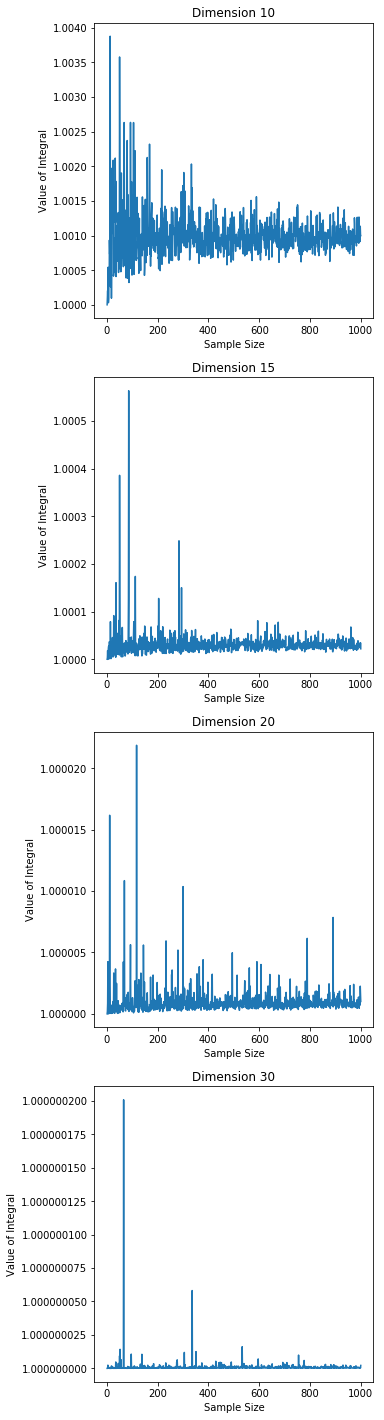

In [92]:
#Let's plot the integral estimated value for each dimension and analyze the results
fig, ax = plt.subplots(4, 1, figsize=(5, 25))
for i in range(0,4):
    ax[i].plot(np.array(range(1,indice)), value_mc_for_dimension[i])
    ax[i].set_title("Dimension " + np.str(dimensions[i]))
    ax[i].set_xlabel('Sample Size')
    ax[i].set_ylabel('Value of Integral')
    ax[i].ticklabel_format(style = 'plain', useOffset = False)

In [107]:
for i in range(4):
    print('The time that it took to do the iterations for dimension ' + np.str(dimensions[i]) + ' was '
          + np.str(np.round(times_for_dimension[i], 2)) + ' s')

The time that it took to do the iterations for dimension 10 was 58.82 s
The time that it took to do the iterations for dimension 15 was 64.93 s
The time that it took to do the iterations for dimension 20 was 60.87 s
The time that it took to do the iterations for dimension 30 was 65.38 s


__Analysis of Monte Carlo Results__

In terms of time there is no much diference in the result (even dimension 15 took more time than 20). This show us the computational power of Monte Carlo. 

On the other hand, we can see that as the dimension increases it is needed a greater sample size to start to see the convergence of Monte Carlo.

### Quasi Monte Carlo Integration

Let's implement the Quasi Monte Carlo Method and see its results.

__Quasi Monte Carlo Method Implementation__

In [79]:
#Computation of Monte Carlo

#Overview of the problem with an example in dimension 10

#The parameter s determines the dimension of the data
s = 10
sample_size = 10000

#Generate the samples in [0,1]^s, it is important to mention that theese samples are easy to generate since
#the domain is the cube, so we require a sample in [0,1] for each dimension.
generator = ghalton.Halton(s) 
samples = np.array(generator.get(sample_size))

#Let's corroborate the shape of the sample matrix
samples.shape

(10000, 10)

In [87]:
#Let's convert it to a Dataframe Object
samples = pd.DataFrame(samples)
samples.shape

(10000, 10)

In [82]:
#Let's compute the function in the samples
multiplication = samples.apply(np.prod, axis = 1)
exponential = np.array(np.exp(multiplication))

#Let's compute the mean and so, the Monte Carlo Integration
value_mc = np.mean(exponential)
value_mc

1.0009232709344955

Let's start with the timing for dimension 10.

In [94]:
#Let's do it changing the sample size and evaluating its convergence
dimensions = [10,15,20,30]
value_mc_for_dimension = []
times_for_dimension = []
for dimension in dimensions:
    time_inicial = time.time()
    indice = 1
    value_mc = []
    while indice <= 2500:
        sample_size = indice

        #Generate the samples in [0,1]^s, it is important to mention that theese samples are easy to generate since
        #the domain is the cube, so we require a sample in [0,1] for each dimension.
        generator = ghalton.Halton(dimension) 
        samples = np.array(generator.get(sample_size))
        samples = pd.DataFrame(samples)
        #Let's compute the function in the samples
        multiplication = samples.apply(np.prod, axis = 1)
        exponential = np.array(np.exp(multiplication))

        #Let's compute the mean and so, the Monte Carlo Integration
        value_mc.append(np.mean(exponential))
        indice += 1
        if indice%500 == 0:
            print("Dimension: " + np.str(dimension) + " and Sample Size: " + np.str(indice))
    time_final = time.time() - time_inicial
    times_for_dimension.append(time_final)
    value_mc_for_dimension.append(value_mc)

Dimension: 10 and Sample Size: 500
Dimension: 10 and Sample Size: 1000
Dimension: 10 and Sample Size: 1500
Dimension: 10 and Sample Size: 2000
Dimension: 10 and Sample Size: 2500
Dimension: 15 and Sample Size: 500
Dimension: 15 and Sample Size: 1000
Dimension: 15 and Sample Size: 1500
Dimension: 15 and Sample Size: 2000
Dimension: 15 and Sample Size: 2500
Dimension: 20 and Sample Size: 500
Dimension: 20 and Sample Size: 1000
Dimension: 20 and Sample Size: 1500
Dimension: 20 and Sample Size: 2000
Dimension: 20 and Sample Size: 2500
Dimension: 30 and Sample Size: 500
Dimension: 30 and Sample Size: 1000
Dimension: 30 and Sample Size: 1500
Dimension: 30 and Sample Size: 2000
Dimension: 30 and Sample Size: 2500


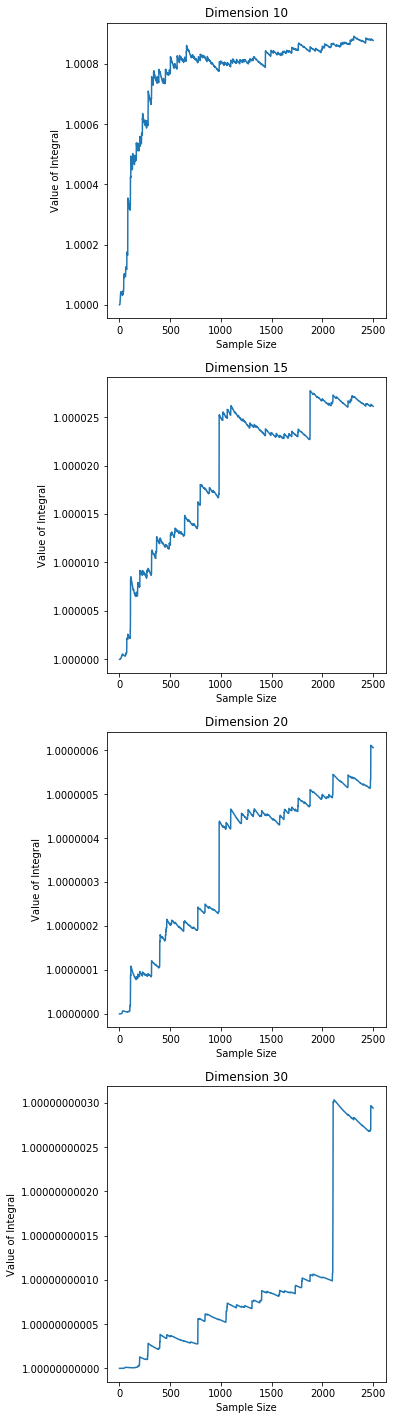

In [96]:
#Let's plot the integral estimated value for each dimension and analyze the results
fig, ax = plt.subplots(4, 1, figsize=(5, 25))
for i in range(0, 4):
    ax[i].plot(np.array(range(1, indice)), value_mc_for_dimension[i])
    ax[i].set_title("Dimension " + np.str(dimensions[i]))
    ax[i].set_xlabel('Sample Size')
    ax[i].set_ylabel('Value of Integral')
    ax[i].ticklabel_format(style='plain', useOffset=False)

In [107]:
for i in range(4):
    print('The time that it took to do the iterations for dimension ' + np.str(dimensions[i]) + ' was '
          + np.str(np.round(times_for_dimension[i], 2)) + ' s')

The time that it took to do the iterations for dimension 10 was 58.82 s
The time that it took to do the iterations for dimension 15 was 64.93 s
The time that it took to do the iterations for dimension 20 was 60.87 s
The time that it took to do the iterations for dimension 30 was 65.38 s


__Analysis of Monte Carlo Results__

In terms of time there is no much diference in the result (even dimension 15 took more time than 20). This show us the computational power of Monte Carlo. 

On the other hand, we can see that as the dimension increases it is needed a greater sample size to start to see the convergence of Monte Carlo.

In [69]:
 = ghalton.Halton(5) 


<ghalton.ghalton_wrapper.Halton; proxy of <Swig Object of type 'Halton *' at 0x11d305240> >